# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd

# file got uploaded in jupyter and is loaded using pandas
df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
# downloading file using requests

import requests

r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', )

with open('image-predictions.tsv', mode='wb') as file:
    file.write(r.content)

df_img = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# keys and ids for twitter api
consumer_key = "Hidden"

consumer_secret = "Hidden"

access_token = "Hidden"

access_token_secret = "Hidden"

In [ ]:
# getting query using tweepy library

import tweepy
import json

api = tweepy.API()

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Query from tweepy
progress = 0

with open('tweet_json.txt', mode='w') as dog_rate:
    for id in df.tweet_id:
        progress += 1
        print(progress)
        try:
            tweet = api.get_status(id, tweet_mode='extended')
            json.dump(tweet._json, dog_rate)
            dog_rate.write('\n')
            
        except:
            pass

In [3]:
# loading query from tweepy to pandas

tweep = 'tweet_json.txt'

tweep_json = pd.read_json(tweep, lines=True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [4]:
# df dataframe visual assessment
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [5]:
df[df.in_reply_to_status_id.notna()].iloc[1]

tweet_id                                                     881633300179243008
in_reply_to_status_id                                      881607037314052096.0
in_reply_to_user_id                                                  47384430.0
timestamp                                             2017-07-02 21:58:53 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          @roushfenway These are good dogs but 17/10 is ...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                                                               NaN
rating_numerator                                                             17
rating_denominator                                                           10
name                                    

In [6]:
# df_img visual assessment
df_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [7]:
# tweep_json dataframe visual assessment
tweep_json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2324,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2325,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2326,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [8]:
# CSV file programmatic assessment
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
df['tweet_id'].nunique()

2356

In [10]:
# TSV file programmatic assessment
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
# JSON file programmatic assessment
tweep_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2328 non-null   datetime64[ns, UTC]
 1   id                             2328 non-null   int64              
 2   id_str                         2328 non-null   int64              
 3   full_text                      2328 non-null   object             
 4   truncated                      2328 non-null   bool               
 5   display_text_range             2328 non-null   object             
 6   entities                       2328 non-null   object             
 7   extended_entities              2058 non-null   object             
 8   source                         2328 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [12]:
# sources used to post tweets in df dataframe
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [13]:
# values under name column in df dataframe
df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [14]:
# values under name that have less than 2 symbols in df
df[df.name.str.len() <= 2].name.value_counts()

a     55
Bo     9
an     7
Mo     1
O      1
Al     1
my     1
by     1
Ed     1
JD     1
Jo     1
Name: name, dtype: int64

In [15]:
# doggo, floofer, pupper and puppo visual analysis

In [16]:
df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [17]:
df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [18]:
df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [19]:
df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### Quality issues

1. `df` dataframe includes retweets

2. `df` dataframe contains data beyond 1st August of 2017, for which there is no image prediction data in `df_img` dataframe

3. In `df` not all tweets are regarding dogs

4. In `df` under `source` column, links have html tags and they should be removed

5. In `df` dataframe need to remove rows, where values are not Null under `in_reply_to_status_id`, because they don't provide actual rating

6. `rating_numerator` and `rating_denominator` can be expressed in single column in `df` dataframe

7. Drop `name`, `doggo`, `floofer`, `pupper` and `puppo` colums. Big chunk of data is missing. Instead will merge breed name with highest confidence coefficient from `df_img` dataframe and also image url

8. Values under `tweet_id` column in `df` dataframe are in int64 format, while they should be strings.

### Tidiness issues
1. Add `retweet_count` and `favorite_count` columns from `tweepy_json` to `df` dataframe

2. Drop redundant and unnecessary columns from `df` dataframe

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [20]:
# Make copies of original pieces of data
df_clean = df.copy()
df_img_clean = df_img.copy()
tweepy_clean = tweep_json.copy()

### Issue 1: `df` dataframe includes retweets

**Define:** Through `retweeted_status_id` identify retweets and delete those rows

#### Code

In [21]:
# dropping rows with retweeted_status_id data
df_clean.drop(df_clean[df_clean['retweeted_status_id'].notna()].index, inplace=True)

#### Test

In [22]:
df_clean[df_clean.retweeted_status_id.notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue 2: `df` dataframe contains data beyond 1st August of 2017, for which there is no image prediction data in `df_img` dataframe

**Define:** In `df` dataframe timestamp will be transformed into datetime format and will get filtered

#### Code

In [23]:
# reformat to datetime
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)

In [24]:
# drop data beyond 1st of August 2017
df_clean.drop(df_clean[df_clean.timestamp >= '8/1/2017'].index, inplace=True)

#### Test

In [25]:
df_clean[df_clean.timestamp >= '8/1/2017']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 2 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2173 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2173 non-null   datetime64[ns, UTC]
 4   source                      2173 non-null   object             
 5   text                        2173 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2115 non-null   object             
 10  rating_numerator            2173 non-null   int64           

### Issue 3: In `df` not all tweets are regarding dogs

**Define:** Using `df_img` dataframe we will identify tweets that don't contain dogs. Either if two or all three predictions show false or the false value has the highest confidence rate

#### Code

In [27]:
# list of tweets with no or low possibility of being dogs
non_dogs = []

In [28]:
# transform booleans into binary values, to filter out mostly false or totally false values
def false_to_bin(x):
    if x == False:
        return 0
    else:
        return 1

In [29]:
# True = 1, False = 0, thus if sum is less than 2, majority should be false
for n in range(len(df_img_clean)):
    
    if (false_to_bin(df_img_clean.p1_dog.iloc[n]) + false_to_bin(df_img_clean.p2_dog.iloc[n]) + 
          df_img_clean.p3_dog.iloc[n]) < 2:
        non_dogs.append(df_img_clean.tweet_id.iloc[n])
        

In [30]:
# drop non dog tweets from both df_clean and df_img_clean dataframe
for x in non_dogs:
    df_clean.drop(df_clean[df_clean['tweet_id'] == x].index, inplace = True)
    df_img_clean.drop(df_img_clean[df_img_clean['tweet_id'] == x].index, inplace = True)

#### Test

In [31]:
len(df_img_clean)

1590

In [32]:
len(df_clean)

1709

### Issue 4: In `df` under `source` column there is link with html tags. We only what tech was used for tweeting

**Define**: We need to remove html link and tags, because they just lead to twitter application downloadpage. In programmatic analysis we identified 5 sources, used to post tweets: iphone, vine, web client and tweetdeck. We will replace the current values under source column with above mentioned sources.

#### Code

In [33]:
# sources used to post tweets
source = ['iPhone', 'Vine', 'Web Client', 'TweetDeck']

In [34]:
# loop through values under source column and replace them with values from source list
for n in df_clean.source:
    for src in source:
        
        if n.find(src) > -1:
            df_clean.source.replace(n, src.lower(), inplace=True)

#### Test

In [35]:
df_clean.source.value_counts()

iphone        1590
vine            91
web client      21
tweetdeck        7
Name: source, dtype: int64

### Issue 5: In `df` dataframe need to remove rows, where values are not Null under `in_reply_to_status_id`, because they don't provide actual rating

**Define:** Rows where in_reply_to_status_id is not null need to be removed, because they are basically comments and not giving rating. So these rows will also get removed.

#### Code

In [36]:
# dropping in_reply_to_status_id
df_clean.drop(df_clean[df_clean.in_reply_to_user_id.notnull()].index, inplace=True)

#### Test

In [37]:
df_clean[df_clean.in_reply_to_user_id.notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [38]:
len(df_clean)

1639

### Issue 6: `rating_numerator` and `rating_denominator` can be expressed in single column in `df` dataframe

**Define:** We can get one single rating by dividing rate_numerator by rating_denominator. This will make it easier to do our analysis using this rating. We can drop these columns after.

#### Code

In [39]:
# declaring new column with values of division of rating_numerator and rating_denominator
df_clean['rating'] = df_clean.rating_numerator / df_clean.rating_denominator

In [40]:
# dropping the columns
df_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

#### Test

In [41]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,1.2
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,1.2
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,iphone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,None,None,None,None,None,1.3
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,iphone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,None,None,None,None,1.3
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,iphone,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,None,None,None,None,None,1.3


### Issue 7: Drop `name`, `doggo`, `floofer`, `pupper` and `puppo` colums. Big chunk of data is missing. Instead will merge breed name with highest confidence coefficient from `df_img` dataframe.

**Define:** There is a lot of missing data under `name`, `doggo`, `floofer`, `pupper` and `puppo` colums. There is nothing much that can be done about it and the existing data won't give us much to analys. Although, we can use Data describing breed of dogs from `df_img` dataframe. We will chose best suiting breed according to `p-_conf` columns.

#### Code

In [42]:
import numpy as np

In [43]:
# drop unnecessary columns 
df_clean.drop(['name', 'doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [44]:
breed_list = []

In [45]:
# append to breed list breed name and tweet_id as dictionary.
# If the highest confidence coefficient boolean is False, we will drop the row

for n in range(len(df_img_clean)):
    
    if df_img_clean.p1_conf.iloc[n] == max(df_img_clean.p1_conf.iloc[n], df_img_clean.p2_conf.iloc[n], df_img_clean.p3_conf.iloc[n]):
        
        breed_list.append({'tweet_id': df_img_clean.tweet_id.iloc[n],
                          'breed': df_img_clean.p1.iloc[n],
                          'dog_test': df_img_clean.p1_dog.iloc[n],
                          'image_url': df_img_clean.jpg_url.iloc[n]})
        
    elif df_img_clean.p2_conf.iloc[n] == max(df_img_clean.p1_conf.iloc[n], df_img_clean.p2_conf.iloc[n], df_img_clean.p3_conf.iloc[n]):
        
        breed_list.append({'tweet_id': df_img_clean.tweet_id.iloc[n],
                          'breed': df_img_clean.p2.iloc[n],
                          'dog_test': df_img_clean.p2_dog.iloc[n],
                          'image_url': df_img_clean.jpg_url.iloc[n]})
        
    elif df_img_clean.p3_conf.iloc[n] == max(df_img_clean.p1_conf.iloc[n], df_img_clean.p2_conf.iloc[n], df_img_clean.p3_conf.iloc[n]):
        
        breed_list.append({'tweet_id': df_img_clean.tweet_id.iloc[n],
                          'breed': df_img_clean.p3.iloc[n],
                          'dog_test': df_img_clean.p3_dog.iloc[n],
                          'image_url': df_img_clean.jpg_url.iloc[n]})
        
    else:
        breed_list.append({'tweet_id': df_img_clean.tweet_id.iloc[n],
                          'breed': np.nan,
                          'dog_test': np.nan,
                          'image_url':np.nan})

In [46]:
# add data from the breed_list to df_clean
df_clean['dog_breed'] = None
df_clean['dog_test'] = None
df_clean['img_url'] = None

for m in df_clean.index:
    
    for n in range(len(breed_list)):
        
        if df_clean.tweet_id.loc[m] == breed_list[n].get('tweet_id'):
            
            df_clean.loc[m, ('dog_breed')] = breed_list[n].get('breed').lower()
            df_clean.loc[m, ('dog_test')] = breed_list[n].get('dog_test')
            df_clean.loc[m, ('img_url')] = breed_list[n].get('image_url')
        
        else:
            continue

In [47]:
# image recognition has failed to identify few images as dogs. thus we will drop those rows.
df_clean.drop(df_clean[df_clean.dog_test == False].index, inplace=True)

In [48]:
# reset indexes
df_clean.reset_index(drop=True,inplace=True)

#### Test

In [49]:
df_clean[df_clean.dog_test == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating,dog_breed,dog_test,img_url


In [50]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating,dog_breed,dog_test,img_url
0,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,1.2,chihuahua,True,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
1,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,1.2,basset,True,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
2,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,iphone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,1.3,chesapeake_bay_retriever,True,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg
3,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,iphone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",1.3,appenzeller,True,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg
4,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,iphone,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,1.3,pomeranian,True,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,iphone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,0.5,miniature_pinscher,True,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg
1542,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,iphone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,0.6,rhodesian_ridgeback,True,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
1543,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,iphone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,0.9,german_shepherd,True,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
1544,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,iphone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,0.7,redbone,True,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg


### Issue 8: Values under `tweet_id` column in `df` dataframe are in int64 format, while they should be strings. 

**Define:** `tweet_id` values should have string format. During analysis it should be treated like string, not as an integer, because doing mathematical operations wouldn't make any sense. 

#### Code

In [51]:
df_clean.tweet_id = df_clean.tweet_id.astype('str')

#### Test

In [52]:
df_clean.tweet_id.dtype

dtype('O')

### Issue 9: Add `retweet_count` and `favorite_count` columns from `tweepy_json` to `df` dataframe

**Define:** `tweepy_json` has valuable data, in `retweet_count` and `favorite_count` columns, which should be added to `df` dataframe

#### Code

In [53]:
# Select only necessary columns from tweepy_clean
tweepy_clean = tweepy_clean[['id_str', 'retweet_count', 'favorite_count']]
tweepy_clean.id_str = tweepy_clean.id_str.astype('str')

In [54]:
# adding values from tweepy_clean to df_clean
df_clean['retweet_count'] = None
df_clean['favorite_count'] = None

In [55]:
# merge dataframes and drop unnecessary columns, rename new columns
df_clean = df_clean.merge(tweepy_clean, how='inner', left_on='tweet_id', right_on='id_str')

df_clean.drop(['retweet_count_x', 'favorite_count_x', 'id_str'], axis=1, inplace=True)

df_clean.rename(columns={'retweet_count_y': 'retweet_count', 'favorite_count_y' : 'favorite_count'}, inplace=True)

#### Test

In [56]:
tweepy_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_str          2328 non-null   object
 1   retweet_count   2328 non-null   int64 
 2   favorite_count  2328 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [57]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating,dog_breed,dog_test,img_url,retweet_count,favorite_count
0,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,1.2,chihuahua,True,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,3538,22417
1,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,1.2,basset,True,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,7885,35857
2,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,iphone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,1.3,chesapeake_bay_retriever,True,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,2651,18103
3,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,iphone,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,1.3,pomeranian,True,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,16052,57772
4,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,iphone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,1.3,irish_terrier,True,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,3680,24924


In [58]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating', 'dog_breed',
       'dog_test', 'img_url', 'retweet_count', 'favorite_count'],
      dtype='object')

### Issue 10: Drop redundant and unnecessary columns from `df` dataframe 

**Define:** There are columns left, that provide no information anymore. Thus, they need to be removed

#### Code

In [59]:
# Drop unnecessary stuff
df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
               'retweeted_status_timestamp', 'dog_test'], axis=1, inplace=True)

#### Test

In [60]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating,dog_breed,img_url,retweet_count,favorite_count
0,891815181378084864,2017-07-31 00:18:03+00:00,iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,1.2,chihuahua,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,3538,22417
1,891327558926688256,2017-07-29 16:00:24+00:00,iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,1.2,basset,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,7885,35857
2,891087950875897856,2017-07-29 00:08:17+00:00,iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,1.3,chesapeake_bay_retriever,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,2651,18103
3,890729181411237888,2017-07-28 00:22:40+00:00,iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,1.3,pomeranian,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,16052,57772
4,890609185150312448,2017-07-27 16:25:51+00:00,iphone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,1.3,irish_terrier,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,3680,24924


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [61]:
df_clean.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [62]:
# Top 3 most common breeds
df_clean.dog_breed.value_counts()[:3]

golden_retriever      92
pembroke              64
labrador_retriever    58
Name: dog_breed, dtype: int64

In [63]:
# group dataframe by dog breeds
group_by_breed_avg = df_clean.groupby('dog_breed').mean()

In [64]:
# Top 3 by rating
group_by_breed_avg.nlargest(n=3, columns=['rating'])

,rating,retweet_count,favorite_count
dog_breed,,,
clumber,2.700000,1513.000000,6302.0
pomeranian,1.342308,2122.538462,6457.5
saluki,1.300000,5782.500000,28502.5


In [65]:
# Top 3 by retweet
group_by_breed_avg.nlargest(n=3, columns=['retweet_count'])

,rating,retweet_count,favorite_count
dog_breed,,,
standard_poodle,1.08,7662.0,19260.0
saluki,1.30,5782.5,28502.5
irish_water_spaniel,1.20,5221.5,20406.0


In [66]:
# Top 3 by favorite count
group_by_breed_avg.nlargest(n=3, columns=['favorite_count'])

,rating,retweet_count,favorite_count
dog_breed,,,
saluki,1.30,5782.5,28502.5
irish_water_spaniel,1.20,5221.5,20406.0
standard_poodle,1.08,7662.0,19260.0


In [67]:
# Most used device
df_clean.source.value_counts()

iphone        926
vine           63
web client     13
tweetdeck       5
Name: source, dtype: int64

### Insights:
1. Top 3 most common breeds are golden retriever, pembroke and labrador retriever;

2. Top 3 on average most retweeted and with highets favorite count breeds are saluki, irish water spaniel and standard poodle;

3. Most used device for tweeting is iphone.

### Visualization

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

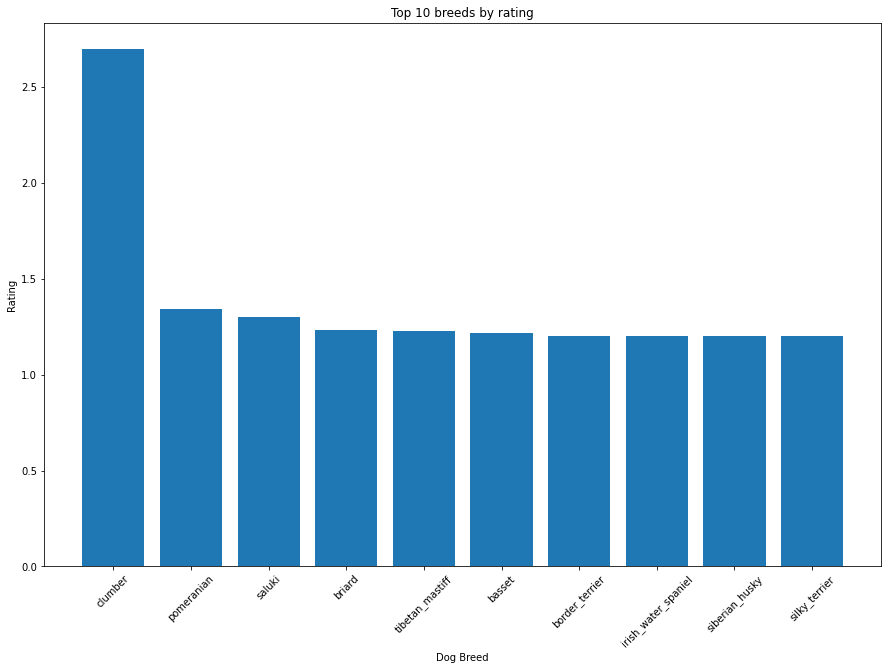

In [69]:
# plot rating of top 10 breeds
fig, ax = plt.subplots(figsize=(15,10))

ax.bar(x = group_by_breed_avg.nlargest(n=10, columns=['rating']).index, 
        height = group_by_breed_avg.nlargest(n=10, columns=['rating']).rating)
plt.xticks(rotation=45)
plt.title('Top 10 breeds by rating')
plt.ylabel('Rating')
plt.xlabel('Dog Breed');

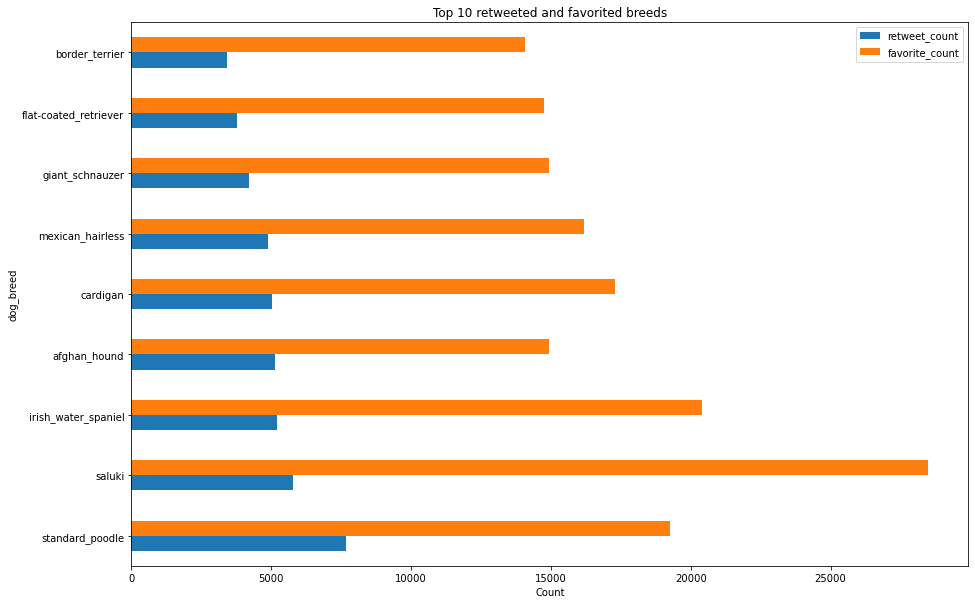

In [70]:
# plot of top 10 retweet and favorite counts

group_by_breed_avg[['retweet_count', 'favorite_count']].sort_values('retweet_count', ascending=False)[:9].plot.barh(figsize=(15,10))
plt.title('Top 10 retweeted and favorited breeds')
plt.xlabel('Count');